In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
%matplotlib inline 
!pip install tabulate

In [2]:
#filepath = r"C:\Users\agraw\Desktop\data_regression.csv"

In [16]:
df=pd.read_csv('data_regression.csv')


In [17]:
y= df['Price']
X = df.drop(['Price'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor().fit(X_train, y_train)

In [19]:
clf.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)>

In [20]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250]}

In [21]:
rmse = np.sqrt(mean_squared_error(y_test,clf.predict(X_test)))
rmse

328259.5896630838

In [8]:
error_depth = []
#for d in p_test3['learning_rate']:
for d in p_test3['n_estimators']:
    print(d)
    rf_best = GradientBoostingRegressor(n_estimators= d )  #For learning_rate
    rf_best = RandomForestRegressor(random_state = 42,n_estimators = d )  #For n_estimators
    rf_best.fit(X_train, y_train)
    predictions_best=rf_best.predict(X_test)
    error_depth.append( np.sqrt(mean_squared_error(y_test,rf_best.predict(X_test))))
    

100
250
500
750
1000
1250


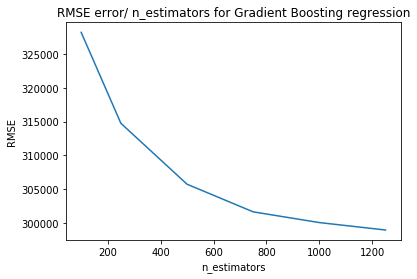

In [9]:
ax = plt.gca()
ax.plot( p_test3['n_estimators'], error_depth)
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE error/ n_estimators for Gradient Boosting regression')
plt.axis('tight')
#plt.savefig('Images/RMSE-nest-GBM.png')
plt.show()

In [22]:
error_depth1 = []
for d in p_test3['learning_rate']:
#for d in p_test3['n_estimators']:
    print(d)
    rf_best = GradientBoostingRegressor(learning_rate= d )  #For learning_rate
    #rf_best = RandomForestRegressor(random_state = 42,n_estimators = d )  #For n_estimators
    rf_best.fit(X_train, y_train)
    predictions_best=rf_best.predict(X_test)
    error_depth.append( np.sqrt(mean_squared_error(y_test,rf_best.predict(X_test))))

0.15
0.1
0.05
0.01
0.005
0.001


Para Tuning

In [12]:
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01], 'n_estimators':[100,250,500,750]}

tuning = GridSearchCV(estimator =GradientBoostingRegressor(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='explained_variance',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
#tuning.grid_scores_,
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.1, 'n_estimators': 750}, 0.7854795876735328)

In [13]:
#Evaluation on test set For Optimized model
#input max depth optimal value from previous chunk 
model1 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=750,max_depth=7, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(X_train,y_train)
rmse = np.sqrt(mean_squared_error(y_test,model1.predict(X_test)))
print('RMSE', rmse)


RMSE 291220.3456978203


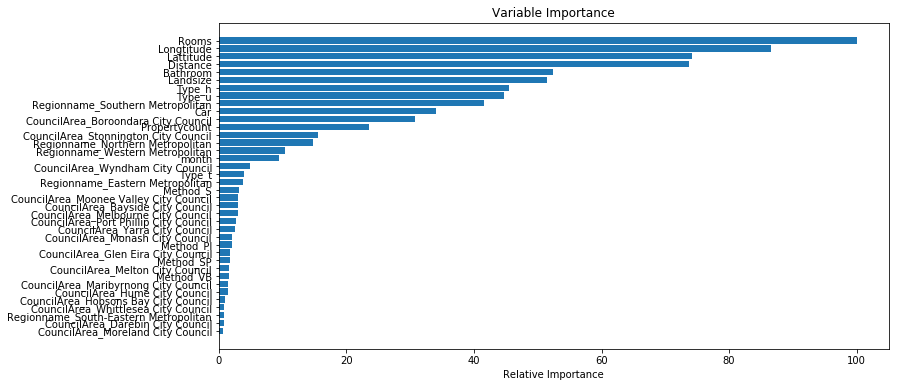

In [15]:
feature_importance = model1.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos[20:], feature_importance[sorted_idx][20:], align='center')
plt.yticks(pos[20:], X.columns[sorted_idx][20:])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
#plt.savefig('Images/Var_imp_GBM.png')
plt.show()


In [23]:
rmse2 = np.sqrt(mean_squared_error(y_test,model1.predict(X_test)))
rmse2

291220.3456978203

In [24]:
train_sizes = [1, 100, 500, 1000, 2500, 5000]
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=750,max_depth=7, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), X = X_train,
                                                   y = y_train, train_sizes = train_sizes, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

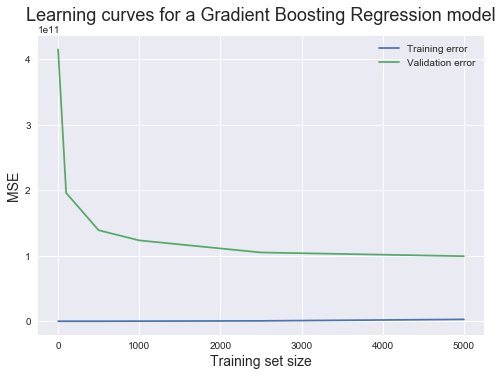

In [25]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Gradient Boosting Regression model', fontsize = 18, y = 1.03)
plt.legend()
#plt.savefig('Images\Learning_curve_GBM.png')
plt.show()



In [ ]:
train_scores_mean